# Simpler integer matrices

One of the annoying things when teaching is that 
the **smartass** that sets the questions will just
take random integer coefficients without thinking
so you get a matrix that isn't nice to work with.


This notebook attempts to solve the problem of the poor instructor/grader.

- 3x3 rank 2 matrix with kernel and equation $ax + by + cz = 0$ for the image
- 3x3 invertible matrix with given determinant and hints on how to find its inverse
- a function for rendering an np.array as a LaTex pmatrix

---

## what you get?

def rand_rank2(max_int=6):<br>

    ''' returns 
        A rank 2,  3x3 matrix
        K vector basis for the kernel
        V vector orthogonal to the image
    '''

def rand_inv(high=3,
             D=[1,1,1])->np.array:<br>
    
    ''' returns an invertible matrix with
        - integer coefficients in the range [-high, high] 
        - determinant is the product of the elements of D
        - a list of row operations to put it in upper triangular form
        
        see https://en.wikipedia.org/wiki/Bruhat_decomposition
        
        
        
def rand_diagonalisable(max_int=3,
             D=[1,2,3])->(np.array,np.array):
    
    '''returns 
    
    3x3 matrix M with
    - integer coefficients in [-max_int,max_int]
    - eigenvalues from the list D
    
    3x3 matrix A with
    - integer coefficients
    - M = A^{-1}DA
    
    '''
        
    

---

Copyright 2022  Greg McShane (macbuse.github)

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.


In [3]:
import numpy as np

def m2t(X):
    def l2t(R):
        return  ' & '.join([str(_) for _ in R])
    
    body = ' \\\\ \n'.join([l2t(_) for _ in X ])
    return f"\\begin{{pmatrix}}\n{body}\n\\end{{pmatrix}}"

def mat2adj(A):     
    '''
    Calculate the adjugate matrix of a 3x3 matrix
    
    https://en.wikipedia.org/wiki/Adjugate_matrix
    '''
    X = np.zeros_like(A)
    v = np.arange(3).astype(int)
    for i in range(3):
        a,b,c = (v + i) % 3
        X[c] = np.cross(A[:,a], A[:,b])
    return X

In [10]:
def kill_factors(v):
        
    def gcd(b,a):
        while b:
            a,b = b,a%b
        return a

    x = sorted(list(abs(v)))
    a = x[2]
    for b in x[:2]:
        a = gcd(a,b)
        if a == 1 : return v
    if a == 0 : return v
    return v//a

def rand_rank2(max_int=6):
    '''returns 
        A rank 2,  3x3 matrix
        K vector basis for the kernel
        V vector orthogonal to the image
    '''

    A = np.random.randint(-max_int, high=max_int,size=9).reshape(-1,3)

    # make sure the first 2 rows are LI for the next step below
    if np.all(np.cross(A[0],A[1])) == 0: 
        #random perturbation this might go beyond max_int :(
        A[0,0] += np.random.choice([-1,1])

    # I don't want a column with all zeros
    for k,v in enumerate(np.all(A[:2,:] == 0,axis=0)):
        if v: A[0,k] = 1

    # and I don't like common factors either
    A[0] = kill_factors(A[0])
    A[1] = kill_factors(A[1])
        
    
    # the 3rd row is a combination of the other two
    V = np.random.choice([-5,-3,-2,-1,1,2,3,5], 3)
    V[2] = -1
    A[2] = V[:2] @ A[:2] 
    
    #kernel is easy to calculate
    K = kill_factors(np.cross(A[0],A[1]))
    
    #now shuffle the rows
    perm = [0,1,2]
    np.random.shuffle(perm)
    
    return A[perm], K, V[perm]

#f"{a}x + {b}y + {c}z = 0":

A,K,I = rand_rank2()
A,K, I

(array([[ 3, -1,  4],
        [-3, -5,  0],
        [ 0, -3,  2]]),
 array([-10,   6,   9]),
 array([-1, -1,  2]))

In [27]:
L = [ rand_rank2() for k in range(100) ]
L = [x for x in L if np.max(np.abs(x[0])) < 10 ]
    

In [43]:
exo = []
for x,y,z in L[:10]:
    #exo.extend(['\item $$ A = ', m2t(x),'$$\n%{}{}'.format(y,z)])
    exo.extend(['\nker = {{t{}}} im = {}x + {}y + {}z = 0 '.format(y,z[0],z[1],z[2])])
print('\n'.join(exo))


ker = {t[ 5 -2  1]} im = 1x + -1y + 2z = 0 

ker = {t[  6 -15  28]} im = 1x + -1y + 2z = 0 

ker = {t[ -6  13 -23]} im = -1x + 1y + 2z = 0 

ker = {t[-3  3 -2]} im = -1x + 5y + -3z = 0 

ker = {t[-12   7  -9]} im = 1x + -3y + -1z = 0 

ker = {t[ -3  -1 -12]} im = -1x + -1y + -1z = 0 

ker = {t[-5 -4 -4]} im = 5x + -1y + -1z = 0 

ker = {t[  7  -3 -10]} im = -1x + -1y + 3z = 0 

ker = {t[-6 -1  2]} im = -2x + 1y + -1z = 0 

ker = {t[ 20 -13   3]} im = -1x + -1y + -1z = 0 


In [7]:
import re

def tidy(ss):
    '''clean up a list of row operations'''
    ss = re.sub('\+ \-', '- ',ss)
    ss = re.sub('([\s|-])1L', lambda x: x[1] + 'L',ss)
    return ss

def ut(L:list, 
       D=[1,1,1])->np.array:
    
    x,y,z = L
    A  = np.diag(D).astype(int)
    A[0,1:] = x,y
    A[1,-1] = z
    return A

def rand_inv(max_int=3,
             D=[1,1,1])->np.array:
    
    ''' returns an invertible 3x3 matrix with
        - integer coefficients in the range [-high, high] 
        - determinant is the product of the elements of D
        - a list of row operations to put it in upper triangular form
        
        see https://en.wikipedia.org/wiki/Bruhat_decomposition
    '''
    
    X, Y = np.random.randint(-max_int, high=max_int, size=6).reshape(2,-1)
    coeffs = -ut(X).T[[1,2,2],[0,0,1]]
    
    row_ops = ['L_2 <- L_2 + {}L_1',
               'L_3 <- L_3 + {}L_1', 
               'L_3 <- L_3 + {}L_2']
    row_ops = [ss.format(coeff) for coeff,ss in zip(coeffs, row_ops)
                                 if coeff != 0]
    
    return ut(X).T @ ut(Y, D=D), '\n'.join(row_ops), ut(Y, D=D)

A, RR, V = rand_inv(D=[1,2,1],
                max_int=5)

AA = mat2adj(A)


print(m2t(A), 
      '\n'*2  +  f"det = {(AA @ A) [0,0]}",
      '\n'*2 + tidy(RR),
      '\n'*2 + f"comatrice = {m2t(AA)}")


\begin{pmatrix}
1 & -5 & 0 \\ 
-3 & 17 & -2 \\ 
-2 & 10 & 1
\end{pmatrix} 

det = 2 

L_2 <- L_2 + 3L_1
L_3 <- L_3 + 2L_1 

comatrice = \begin{pmatrix}
37 & 5 & 10 \\ 
7 & 1 & 2 \\ 
4 & 0 & 2
\end{pmatrix}


In [ ]:
mats = []
for _ in range(100):
    A, RR, V = rand_inv(D=[1,2,1],
                    max_int=5)

    AA = mat2adj(A)
    mats.append([A,AA, RR,V])

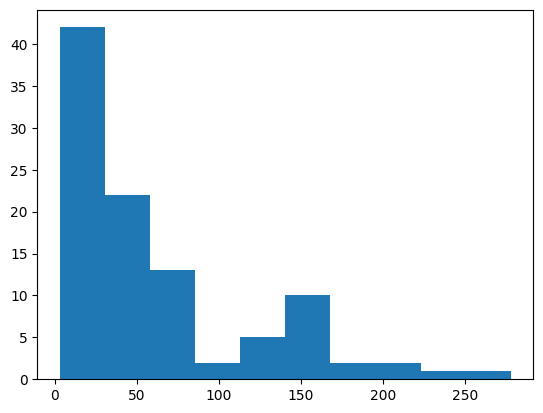

In [32]:
import matplotlib.pyplot as plt

nn = [ np.max(np.abs(mm[1])) for mm in mats]

plt.hist(nn, bins = 10);


In [36]:
good = [ mm   for mm in mats if np.max(np.abs(mm[1])) < 10]

In [74]:
A,B, R, T = good[0]
det = np.linalg.det

In [75]:
exo = []
i = 0
for A,B,R,T in good:
    if i % 2 == 0: A,B = B,A
    i += 1
    print(det(A),det(B))
    exo.extend(['\item $$ A = ', m2t(A),',\,','B = ', m2t(B),'$$'])

print('\n'.join(exo))

3.9999999999999947 2.0
2.0 4.0
4.0 2.0
1.999999999999998 3.9999999999999964
4.0 2.0
2.0 4.0
\item $$ A = 
\begin{pmatrix}
-6 & 5 & 6 \\ 
0 & 1 & 2 \\ 
4 & 0 & 2
\end{pmatrix}
,\,
B = 
\begin{pmatrix}
1 & -5 & 2 \\ 
4 & -18 & 6 \\ 
-2 & 10 & -3
\end{pmatrix}
$$
\item $$ A = 
\begin{pmatrix}
1 & -5 & -1 \\ 
-1 & 7 & 2 \\ 
0 & -2 & 0
\end{pmatrix}
,\,
B = 
\begin{pmatrix}
4 & 2 & -3 \\ 
0 & 0 & -1 \\ 
2 & 2 & 2
\end{pmatrix}
$$
\item $$ A = 
\begin{pmatrix}
-2 & 0 & -2 \\ 
1 & 1 & -2 \\ 
4 & 0 & 2
\end{pmatrix}
,\,
B = 
\begin{pmatrix}
1 & 0 & 1 \\ 
-5 & 2 & -3 \\ 
-2 & 0 & -1
\end{pmatrix}
$$
\item $$ A = 
\begin{pmatrix}
1 & -2 & -2 \\ 
0 & 2 & 2 \\ 
3 & -14 & -13
\end{pmatrix}
,\,
B = 
\begin{pmatrix}
2 & 2 & 0 \\ 
6 & -7 & -2 \\ 
-6 & 8 & 2
\end{pmatrix}
$$
\item $$ A = 
\begin{pmatrix}
-3 & 1 & 3 \\ 
-1 & 1 & -1 \\ 
-2 & 0 & 2
\end{pmatrix}
,\,
B = 
\begin{pmatrix}
1 & -1 & -2 \\ 
2 & 0 & -3 \\ 
1 & -1 & -1
\end{pmatrix}
$$
\item $$ A = 
\begin{pmatrix}
1 & 4 & 4 \\ 
-1 & -2 & -2 \\ 

In [67]:
A = good[0][0]

array([[ -23,  105,  -34],
       [ -80,  364, -118],
       [  44, -200,   65]])

In [751]:
! ./.g

[main 5508df3] web
 1 file changed, 219 insertions(+), 60 deletions(-)
Counting objects: 3, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 1.69 KiB | 1.69 MiB/s, done.
Total 3 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/macbuse/random-matrices-.git
   3b71991..5508df3  main -> main


In [44]:
np.linalg.inv(A)

LinAlgError: Singular matrix

In [16]:
U = np.identity(3)
#U = A.copy()
U[1] = U[1] - 5*U[0]
U[2] = U[2] + 3*U[0]
U[2] = U[2] + 3*U[1]
U

array([[  1.,   0.,   0.],
       [ -5.,   1.,   0.],
       [-12.,   3.,   1.]])

In [9]:
U = A.copy()
U[1] = U[1] + 6*U[0]
U[2] = U[2]  - 7*U[0]
U[2] = U[2]  + 6*U[1]
U

array([[  1,  -2,   0],
       [  5,  -8,   4],
       [ 26, -38,  29]])

---

# next trick

In [18]:

def rand_diagonalisable(max_int=3,
             D=[1,2,3])->(np.array,np.array):
    
    '''returns 
    
    3x3 matrix M with
    - integer coefficients in [-max_int,max_int]
    - eigenvalues from the list D
    
    3x3 matrix A with
    - integer coefficients
    - D = A^{-1}M A:w
    '''
    
    # need to invert A so make sure det A = 1
    A, ops, V = rand_inv(D=[1,1,1])
    for i in range(3):
        A[i] = kill_factors(A[i])
    
    #now the entries in each row have no common factors
    #flip so it's true for the columns instead
    A = A.transpose()

    M =  A @ np.diag(D) @ np.linalg.inv(A)
    
    #bit of a hack np.int don't  work nice
    return np.round(M).astype(int), A
    

---

# Use case 

In [26]:
M, A = rand_diagonalisable(D=[1,2,3])
#M, A, (np.linalg.inv(A)@M@A)[[0,1,2],[0,1,2]]

In [27]:
M@A, A

(array([[ 1,  0,  3],
        [ 1,  2,  0],
        [ 0, -6, 12]]),
 array([[ 1,  0,  1],
        [ 1,  1,  0],
        [ 0, -3,  4]]))

In [478]:
mm = []

In [402]:
mm = mm[:-1]

In [28]:
for M,A in mm:
    dd = np.round( np.linalg.det(M))
    print(f"det ={dd} <br>")
    print('val propres = {}<br>'.format( (np.linalg.inv(A)@ M @A)[[0,1,2],[0,1,2]] ) )
    print('vecteurs propres =', A.transpose(),'<br>\n')

NameError: name 'mm' is not defined

In [570]:
'val propres = {}<br>\n'.format(2)

'val propres = 2<br>\n'

In [571]:
np.linalg.inv(A)@M@A)[[0,1,2],[0,1,2]] 

SyntaxError: unmatched ')' (2639531852.py, line 1)

In [526]:
for M,A in mm:
    print("\item $$" + m2t(M) + "$$\n")
    #print(np.linalg.inv(A)@M@A)

\item $$\begin{pmatrix}
0 & -1 & -1 \\ 
-2 & 7 & 2 \\ 
4 & -16 & -5
\end{pmatrix}$$

\item $$\begin{pmatrix}
7 & 0 & 2 \\ 
-7 & 2 & -3 \\ 
-12 & 0 & -3
\end{pmatrix}$$

\item $$\begin{pmatrix}
3 & -4 & 2 \\ 
4 & -7 & 4 \\ 
4 & -8 & 5
\end{pmatrix}$$

\item $$\begin{pmatrix}
3 & -2 & -4 \\ 
-12 & 5 & 12 \\ 
8 & -4 & -9
\end{pmatrix}$$

\item $$\begin{pmatrix}
0 & 1 & 0 \\ 
-2 & 3 & 0 \\ 
-4 & 2 & 2
\end{pmatrix}$$

\item $$\begin{pmatrix}
5 & 2 & 0 \\ 
-2 & 0 & -1 \\ 
4 & 2 & 1
\end{pmatrix}$$



In [464]:
mm[-2]

(array([[-2,  2,  4],
        [-4,  4,  4],
        [ 2, -2, -1]]),
 array([[ 1,  1,  2],
        [ 1,  3,  2],
        [ 0, -1, -1]]))

In [458]:
import pickle
with open("mats.pkl", "wb") as fp:
    pickle.dump(mm,fp)